In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping


##Loading and exploring dataset

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Quick shape check:
print("Training  images:", X_train.shape)  # (60000, 28, 28)
print("Training labels:", y_train.shape)  # (60000,)
print("Test      images:", X_test.shape)   # (10000, 28, 28)
print("Test      labels:", y_test.shape)   # (10000,)

Training  images: (60000, 28, 28)
Training labels: (60000,)
Test      images: (10000, 28, 28)
Test      labels: (10000,)


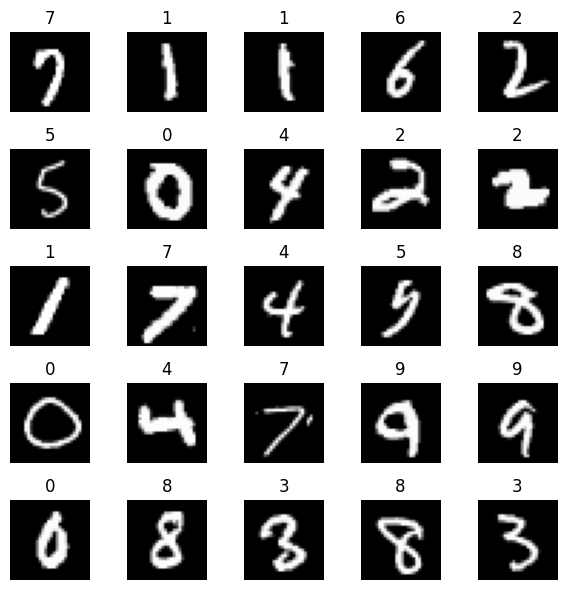

In [ ]:
#Having a look at some random images
idxs = np.random.choice(len(X_train), size=25, replace=False)

plt.figure(figsize=(6,6))
for i, idx in enumerate(idxs):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(y_train[idx])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#balance checking
counts=pd.Series(y_train).value_counts()
print(counts)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


##Applying Normalization to our dataset

In [ ]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

##Building a neural network

In [ ]:
#Initially we are training our model for minimal epochs with no callbacks
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training our model
model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8701 - loss: 0.4690 - val_accuracy: 0.9562 - val_loss: 0.1544
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9579 - loss: 0.1391 - val_accuracy: 0.9623 - val_loss: 0.1258
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9737 - loss: 0.0900 - val_accuracy: 0.9696 - val_loss: 0.1006
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9807 - loss: 0.0649 - val_accuracy: 0.9728 - val_loss: 0.0907
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9701 - val_loss: 0.1023


In [ ]:
#early stopping
early_stopping=EarlyStopping(monitor='val_loss',patience=3,min_delta=0.0001,restore_best_weights=True)


Epoch 1/19
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9959 - loss: 0.0145 - val_accuracy: 0.9763 - val_loss: 0.0919
Epoch 2/19
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9956 - loss: 0.0143 - val_accuracy: 0.9772 - val_loss: 0.0951
Epoch 3/19
 298/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9994 - loss: 0.0064

KeyboardInterrupt: 

In [ ]:
#training with early stopping and higher epochs
model1=Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model1.fit(X_train,y_train,epochs=20,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8617 - loss: 0.4835 - val_accuracy: 0.9548 - val_loss: 0.1632
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9603 - loss: 0.1356 - val_accuracy: 0.9663 - val_loss: 0.1137
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9720 - loss: 0.0910 - val_accuracy: 0.9660 - val_loss: 0.1159
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9810 - loss: 0.0634 - val_accuracy: 0.9680 - val_loss: 0.1043
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9863 - loss: 0.0502 - val_accuracy: 0.9722 - val_loss: 0.0941
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9887 - loss: 0.0394 - val_accuracy: 0.9742 - val_loss: 0.0901
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9907 - loss: 0.0292 - val_accuracy: 0.9751 - val_loss: 0.0907
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9928 - loss: 0.0242

##Testing the model

In [ ]:
test_loss,test_accuracy=model1.evaluate(X_test,y_test)
print("Test Accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0975
Test Accuracy: 0.9760000109672546


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predictions=model1.predict(X_test)
predictions=np.argmax(predictions,axis=1)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 972    0    1    3    0    1    0    1    2    0]
 [   0 1124    4    0    0    0    1    0    6    0]
 [   9    0  999    7    2    0    2    4    8    1]
 [   0    0    1 1002    0    2    0    2    3    0]
 [   3    0    2    0  963    0    2    1    2    9]
 [   4    0    0   20    1  855    3    2    6    1]
 [   8    3    1    1    9    6  924    2    4    0]
 [   1    6    7    5    0    0    0 1000    3    6]
 [   5    0    3    9    2    0    0    3  949    3]
 [   4    6    0    6    9    4    0    4    4  972]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.96      0.98    

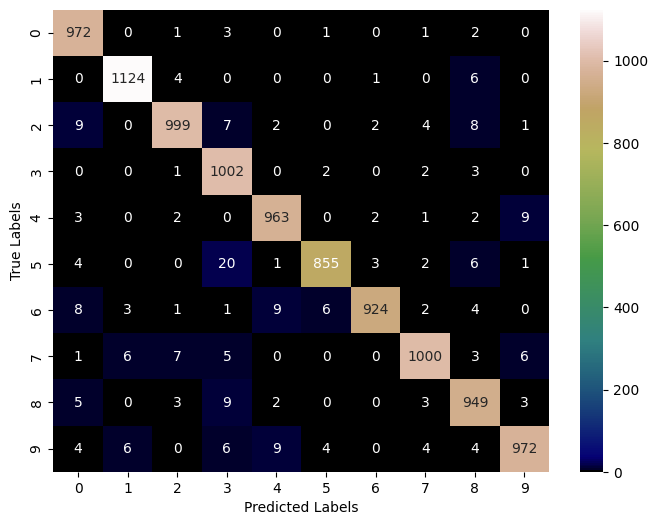

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='d',cmap='gist_earth')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
model1.save('mnist_model.h5')

In [ ]:
model1=keras.models.load_model('mnist_model.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'mnist_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
test_loss,test_accuracy=modeltemp.evaluate(X_test,y_test)
print("Test Accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9712 - loss: 0.0975
Test Accuracy: 0.9760000109672546
